In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# exibir imagens em grid
from matplotlib import pyplot as plt

def showImages(imgsArray, titlesArray, size, grid=(1,1)):
    y, x = grid
    fig, axes = plt.subplots(y, x, figsize=size)
    axes = axes.ravel() if isinstance(axes, np.ndarray) else np.array([axes])

    if len(imgsArray) != len(titlesArray):
        print("ERRO: O número de imagens e títulos deve ser o mesmo!")
        return

    for idx, (img, title) in enumerate(zip(imgsArray, titlesArray)):
        if len(img.shape) == 2:  # A imagem é tons de cinza
            axes[idx].imshow(img, cmap='gray')
        else:  # A imagem é RGB
            axes[idx].imshow(img)
        axes[idx].set_title(title, fontdict={'fontsize': 18, 'fontweight': 'medium'}, pad=10)
        if len(title) == 0:
            axes[idx].axis('off')

    plt.tight_layout()  # ajusta automaticamente o layout para evitar sobreposição
    plt.show()
    
#Para exibir uma única imagem:
#showImages([img1], ["Título 1"], size=(10,10), grid=(1,1))

#Para exibir duas imagens lado a lado:
#showImages([img1, img2], ["Título 1", "Título 2"], size=(10,10), grid=(1,2))

#Para exibir quatro imagens em uma grade 2x2:
#showImages([img1, img2, img3, img4], ["Título 1", "Título 2", "Título 3", "Título 4"], size=(10,10), grid=(2,2))

# 1. Introdução

## 1.1 Definição e propósito de um histograma em processamento de imagem

Um histograma, no contexto de Processamento de Imagens, é uma representação gráfica (tabela) da distribuição dos pixels em uma imagem. É um recurso valioso na análise e manipulação de imagens, fornecendo uma visão detalhada da intensidade dos pixels, cores e contrastes da imagem.

O histograma é construído a partir da contagem dos pixels com os mesmos valores de intensidade na imagem, ou seja, ele mostra a frequência de cada nível de intensidade. Cada nível de intensidade é representado ao longo do eixo x, e a contagem de pixels é representada ao longo do eixo y.

Os histogramas são ferramentas essenciais para entendermos características importantes de uma imagem, como o contraste, a distribuição de brilho e a presença de cores dominantes. Eles também são frequentemente usados para ajustar imagens, melhorar o contraste e equalizar a distribuição de cores.

## 1.2 Como os histogramas são representados e interpretados

Em um histograma, o eixo x representa a intensidade dos pixels (em uma escala de 0 a 255 para uma imagem de 8 bits), e o eixo y representa o número de pixels na imagem com essa intensidade de cor. Portanto, cada barra no gráfico do histograma representa a frequência (ou seja, a quantidade) de pixels que possuem um determinado valor de intensidade.

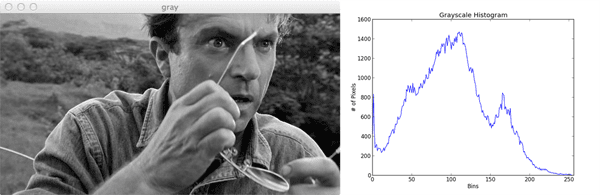
[Fonte: PyImageSearch](https://pyimagesearch.com/2014/01/22/clever-girl-a-guide-to-utilizing-color-histograms-for-computer-vision-and-image-search-engines/)
   
A interpretação de um histograma pode fornecer insights sobre o contraste, o brilho e a intensidade da imagem. Por exemplo, um histograma com a maioria dos dados no lado esquerdo (mais próximo a 0) sugere que a imagem é escura. Da mesma forma, se a maioria dos dados estiver à direita (mais próxima a 255), a imagem é clara. Um histograma com distribuição uniforme pode sugerir uma imagem bem equilibrada em termos de contraste e iluminação.

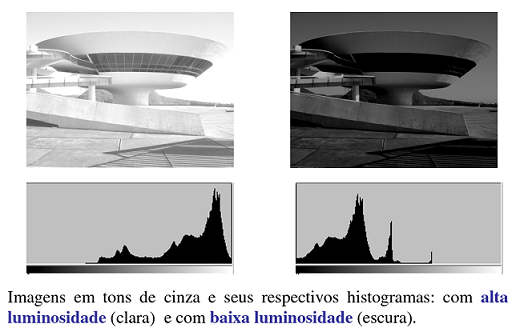
[Fonte: Aura Conci](http://www.ic.uff.br/~aconci/temaUM2020-HISTOGRAMA.pdf)

## 1.3 Os componentes de um histograma (bins, dimensões, range)

Bins: Um bin em um histograma representa um intervalo de valores de intensidade de pixel. O número de bins determina o nível de granularidade do histograma. Um número elevado de bins dará um histograma mais detalhado, enquanto um número menor de bins irá simplificar a representação.

Dimensões: A dimensão do histograma depende do número de características que você está considerando. Por exemplo, um histograma de uma imagem em escala de cinza terá apenas uma dimensão (intensidade de cinza), enquanto um histograma de uma imagem colorida pode ter três dimensões (um para cada canal de cor: vermelho, verde e azul).

Range: O range representa os possíveis valores de intensidade que os pixels podem ter. Para imagens em escala de cinza de 8 bits, o intervalo geralmente é [0, 256], indicando que a intensidade de cada pixel pode variar de 0 (preto total) a 255 (branco total).

# 2. Prática em Python
## 2.1 Calculando histograma de imagem em tons de cinza

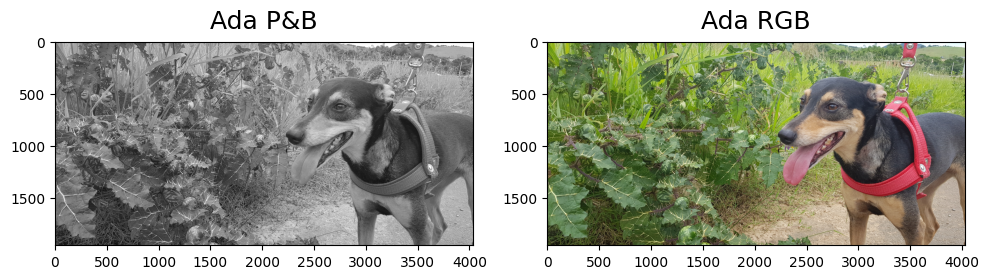

In [2]:
# Carregar a imagem
imageBW = cv2.imread('ada.jpg', 0)
imageRGB = cv2.imread('ada.jpg')
imageRGB = cv2.cvtColor(imageRGB, cv2.COLOR_BGR2RGB)

# Exibir as imagens abaixo
showImages([imageBW, imageRGB], ["Ada P&B", "Ada RGB"], size=(10, 10), grid=(1,2))

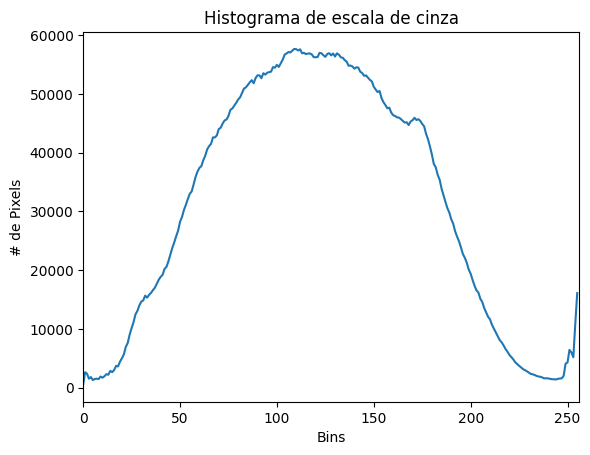

In [3]:
import cv2
import matplotlib.pyplot as plt

# Carregar a imagem
image = cv2.imread('ada.jpg')

# Converter a imagem para escala de cinza
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calcular o histograma
'''
[gray_image]: Este é o primeiro argumento da função e é uma lista das imagens de entrada. 
Aqui, você está passando uma lista contendo apenas uma imagem (gray_image).

[0]: Este é o segundo argumento e representa os canais de cores para os quais o histograma é calculado. 
No caso de imagens em tons de cinza, o valor é [0] porque só há um canal. 
Se a imagem fosse colorida e se quisesse calcular o histograma para todos os canais de cores, 
passaria [0, 1, 2].

None: Este é o terceiro argumento e representa a máscara. 
Se você passar uma máscara, o histograma será calculado apenas para os pixels da imagem que estão mascarados.
Aqui, é passado None, o que significa que o histograma é calculado para toda a imagem.

[256]: Este é o quarto argumento e representa o número de bins no histograma. 
Um bin é um intervalo de valores de intensidade e cada bin conta o número de pixels na imagem que têm 
valores de intensidade dentro desse intervalo. 
Aqui, é passado [256], o que significa que será criado um histograma com 256 bins. 
Portanto, cada bin corresponderá a um valor de intensidade diferente na imagem, variando de 0 a 255.

[0, 256]: Este é o quinto argumento e representa o intervalo de valores de intensidade. 
Aqui, você passou [0, 256], o que significa que está calculando o histograma para todas as cores, 
de 0 a 255. 
Se quisesse calcular o histograma apenas para um subconjunto específico de valores, passaria um 
intervalo diferente.
'''
histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Plotar o histograma
plt.figure()
plt.title("Histograma de escala de cinza")
plt.xlabel("Bins")
plt.ylabel("# de Pixels")
plt.plot(histogram)
plt.xlim([0, 256])
plt.show()

## 2.2 Calculando histograma colorido

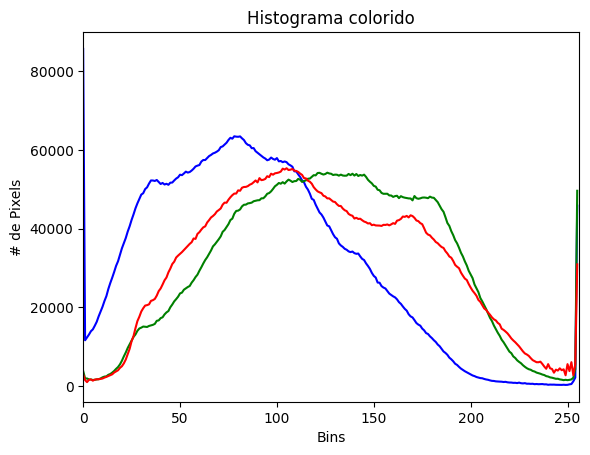

In [4]:
# Carregar a imagem
image = cv2.imread('ada.jpg')

# Calcular o histograma para cada canal de cor
colors = ('b', 'g', 'r')
for i, color in enumerate(colors):
    histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = color)
    plt.xlim([0, 256])

plt.title("Histograma colorido")
plt.xlabel("Bins")
plt.ylabel("# de Pixels")
plt.show()

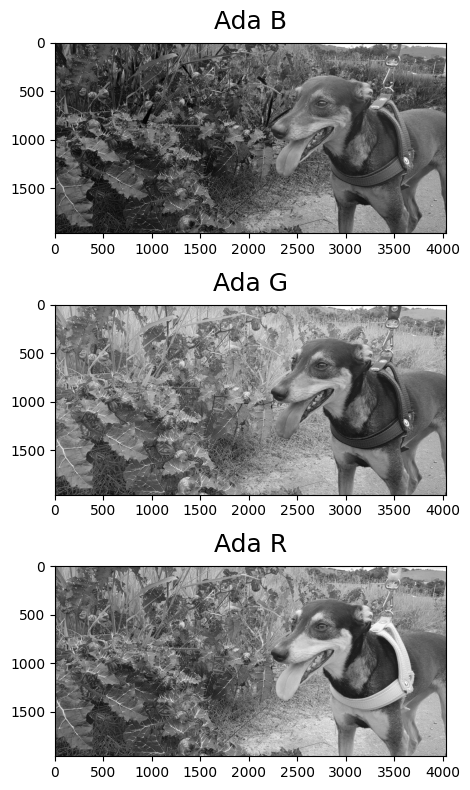

In [5]:
# Carregue a imagem
image = cv2.imread('ada.jpg')

# Divida a imagem em canais B, G e R
B, G, R = cv2.split(image)

# Agora, B, G e R são imagens monocromáticas correspondentes aos canais azul, 
# verde e vermelho da imagem original.
showImages([B, G, R], ["Ada B", "Ada G", "Ada R"], size=(8, 8), grid=(3,1))

## 2.3 Calculando histograma de máscara (P&B)

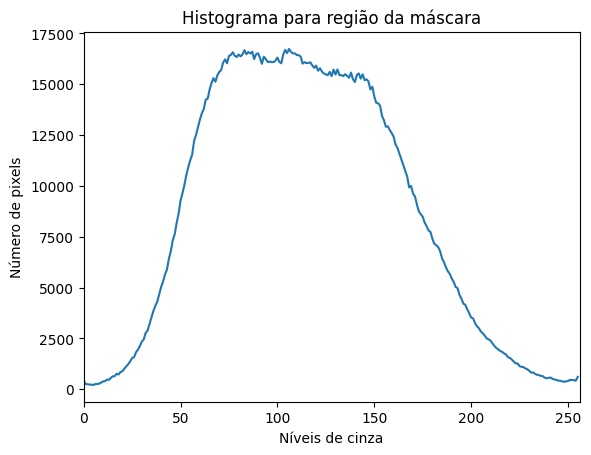

In [6]:
# Carregue a imagem
image = cv2.imread('ada.jpg', cv2.IMREAD_GRAYSCALE)

# Crie uma máscara do mesmo tamanho que a imagem
mask = np.zeros(image.shape[:2], np.uint8) # image.shape[:2] retorna apenas a altura e largura da imagem

# Defina uma região da máscara para ser 255 (branca)
# Pegamos uma parte considerável da vegetação
mask[50:1500, 500:2000] = 255

# Calcule o histograma para a região da imagem definida pela máscara
hist_mask = cv2.calcHist([image], [0], mask, [256], [0, 256])

# Exiba o histograma
plt.figure()
plt.title('Histograma para região da máscara')
plt.xlabel('Níveis de cinza')
plt.ylabel('Número de pixels')
plt.plot(hist_mask)
plt.xlim([0, 256])
plt.show()

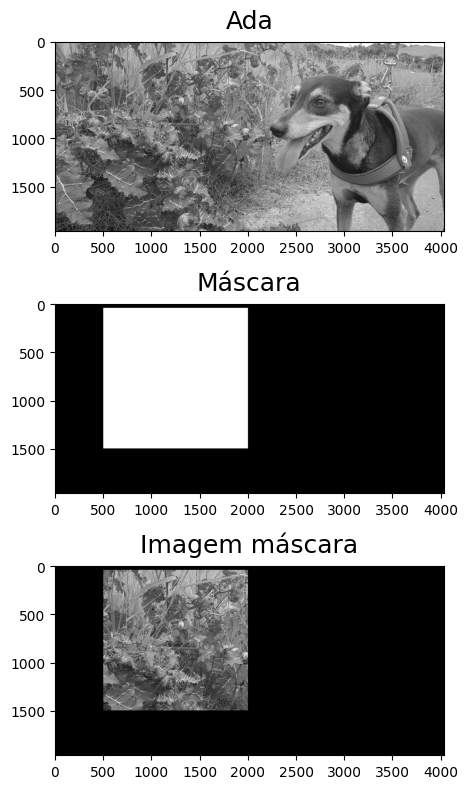

In [7]:
# Exibindo a imagem, a máscara e a região da imagem definida pela máscara
titles = ["Ada", "Máscara", "Imagem máscara"]
showImages([image, mask, cv2.bitwise_and(image, image, mask=mask)], titles, size=(8, 8), grid=(3,1))

## 2.4 Calculando histograma de máscara (RGB)

In [8]:
# Carregue a imagem em colorido
image = cv2.imread('ada.jpg')

# Crie uma máscara do mesmo tamanho que a imagem
mask = np.zeros(image.shape[:2], np.uint8) # image.shape[:2] retorna apenas a altura e largura da imagem

# Defina uma região da máscara para ser 255 (branca)
# Pegamos a região da língua da Ada
mask[1000:1300, 2250:2750] = 255

# Calcule o histograma para a região da imagem definida pela máscara
# para cada canal de cor
hist_mask_b = cv2.calcHist([image], [0], mask, [256], [0, 256])
hist_mask_g = cv2.calcHist([image], [1], mask, [256], [0, 256])
hist_mask_r = cv2.calcHist([image], [2], mask, [256], [0, 256])

# Exiba os histogramas
plt.figure()
plt.title('Histogramas para região da máscara')
plt.xlabel('Intensidade de cor')
plt.ylabel('Número de pixels')

# Plotando cada histograma com sua cor correspondente
plt.plot(hist_mask_b, color='b')
plt.plot(hist_mask_g, color='g')
plt.plot(hist_mask_r, color='r')

plt.xlim([0, 256])
plt.show()

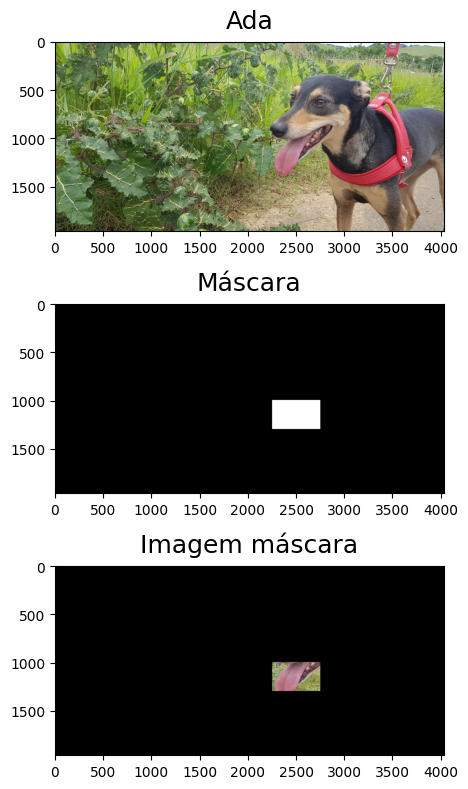

In [9]:
# Exibindo a imagem, a máscara e a região da imagem definida pela máscara
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
titles = ["Ada", "Máscara", "Imagem máscara"]
showImages([image, mask, cv2.bitwise_and(image, image, mask=mask)], titles, size=(8, 8), grid=(3,1))

# 3. Equalização de Histograma

A equalização de histograma é uma técnica que busca melhorar o contraste de uma imagem ajustando a distribuição de intensidade de seus pixels. A ideia por trás dessa técnica é distribuir os tons de maneira mais uniforme ao longo de todo o espectro de níveis de cinza.

Isso é especialmente útil em imagens com contraste pobre devido à predominância de determinados tons de cinza (por exemplo, uma imagem muito escura ou muito clara). Ao redistribuir os níveis de cinza, a equalização do histograma pode aumentar o contraste global da imagem, tornando detalhes mais visíveis.

https://pt.wikipedia.org/wiki/Equaliza%C3%A7%C3%A3o_de_histograma

## 3.1 Aplicando a Equalização de Histograma

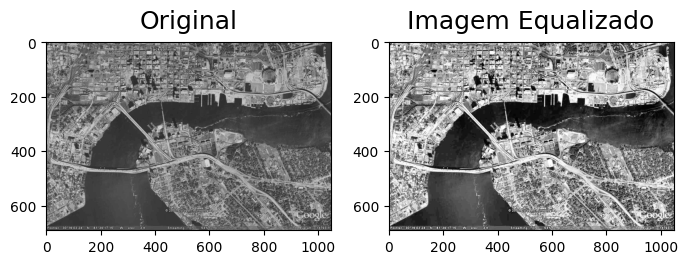

In [10]:
import cv2
import matplotlib.pyplot as plt

# Carrega a imagem em escala de cinza
image = cv2.imread('sat_map3.jpg', 0)

# Realiza a equalização do histograma
equ = cv2.equalizeHist(image)

# Exiba as imagens antes e depois da equalização do histograma
showImages([image, equ], ['Original', 'Imagem Equalizado'], size=(7,4), grid=(1,2))

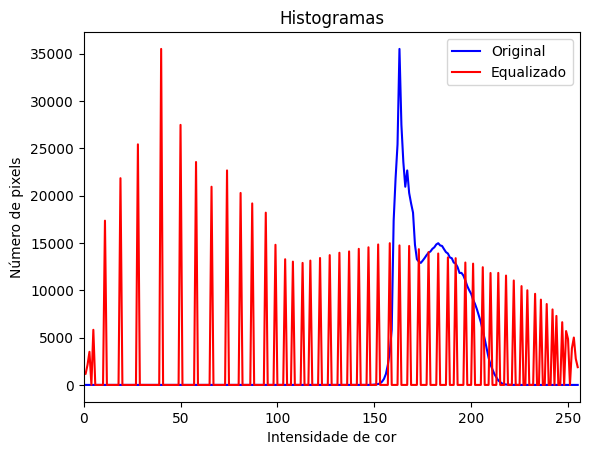

In [11]:
# Calcule o histograma da imagem original e da imagem equalizada
hist_image = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_equ = cv2.calcHist([equ], [0], None, [256], [0, 256])

# Exiba os histogramas
plt.figure()
plt.title('Histogramas')
plt.xlabel('Intensidade de cor')
plt.ylabel('Número de pixels')

# Plotando cada histograma
plt.plot(hist_image, color='b', label='Original')
plt.plot(hist_equ, color='r', label='Equalizado')

plt.legend()
plt.xlim([0, 256])
plt.show()

## 3.2 Aplicando a Equalização de Histograma em Imagem Colorida

A equalização do histograma em imagens coloridas apresenta uma complexidade adicional, visto que é necessário aplicá-la em cada canal de cor de forma independente.

Para preservar a fidelidade das cores originais durante esse processo, uma estratégia eficaz envolve a conversão inicial da imagem para um espaço de cores específico - como o YCrCb. Nesse espaço de cores, a equalização do histograma é aplicada somente ao canal Y, que representa a luminância. Dessa forma, modificamos exclusivamente a distribuição dos níveis de brilho na imagem, sem causar alterações indesejadas nas cores originais.

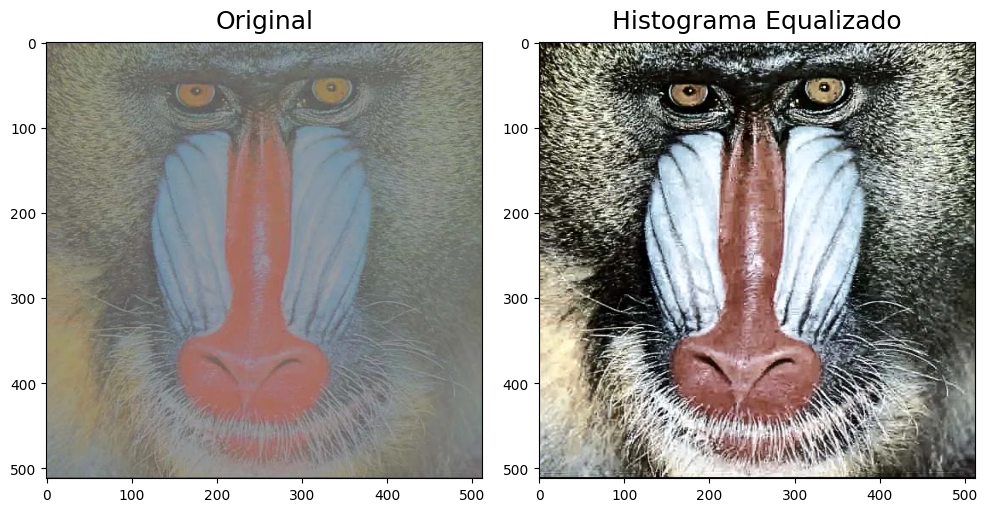

In [12]:
# Carregue a imagem colorida
image = cv2.imread('mandrill_condec.jpg')

# Converta a imagem para o espaço de cores YCrCb
ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

# Realize a equalização do histograma no canal Y
ycrcb[:,:,0] = cv2.equalizeHist(ycrcb[:,:,0])

# Converta a imagem de volta para o espaço de cores BGR
equ = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2RGB)

# Exiba as imagens antes e depois da equalização do histograma
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
showImages([image, equ], ['Original', 'Histograma Equalizado'], size=(10,5), grid=(1,2))

# 4. Comparação de Histogramas

Comparar histogramas pode ser extremamente útil em muitas aplicações, incluindo reconhecimento de imagem, recuperação de imagem baseada em conteúdo, e até mesmo diagnóstico médico. Em geral, a comparação de histogramas é uma técnica poderosa para analisar se duas imagens são semelhantes ou não.

O OpenCV fornece vários métodos para comparar histogramas, cada um com suas próprias características. Vamos nos concentrar em quatro deles:

* Correlação (cv2.HISTCMP_CORREL): Essa métrica avalia o quanto dois histogramas são semelhantes entre si. Se o valor da correlação for 1, eles são idênticos, e se for -1, eles são completamente diferentes. É uma métrica bastante intuitiva e fácil de entender.
* Chi-Quadrado (cv2.HISTCMP_CHISQR): Esta métrica analisa o quão diferentes são os dois histogramas, calculando uma soma de diferenças quadradas entre eles. Quanto maior o valor, mais diferentes são os histogramas. Essa métrica pode ser mais sensível a pequenas diferenças.
* Intersecção (cv2.HISTCMP_INTERSECT): A intersecção mede o quão semelhantes são dois histogramas, olhando para as áreas onde eles se sobrepõem. Quanto maior a intersecção, mais similares são os histogramas. É útil quando você quer entender as semelhanças em vez das diferenças.
* Bhattacharyya distance (cv2.HISTCMP_BHATTACHARYYA): Essa é uma medida da similaridade entre dois histogramas, que leva em consideração a distribuição e a forma dos histogramas. Valores próximos a 0 indicam que os histogramas são muito semelhantes, enquanto valores mais altos indicam diferenças. É uma métrica mais complexa que pode ser útil em situações que exigem uma análise mais profunda da estrutura dos dados.

## 4.1 Comparação Visual do Histograma de 2 imagens

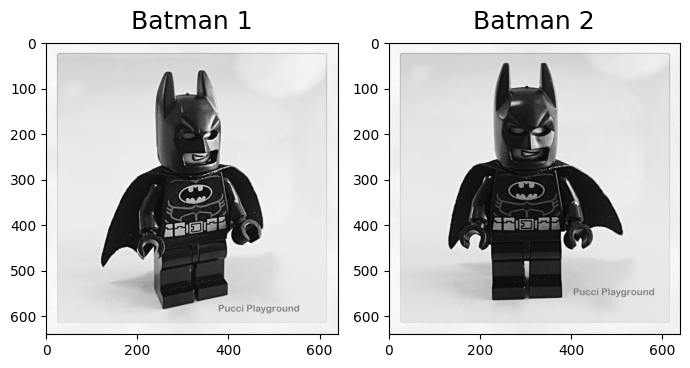

In [13]:
import cv2
import numpy as np

# Carrega duas imagens
image1 = cv2.imread('legos/batman1.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('legos/batman2.jpg', cv2.IMREAD_GRAYSCALE)

showImages([image1, image2], ['Batman 1', 'Batman 2'], size=(7,4), grid=(1,2))

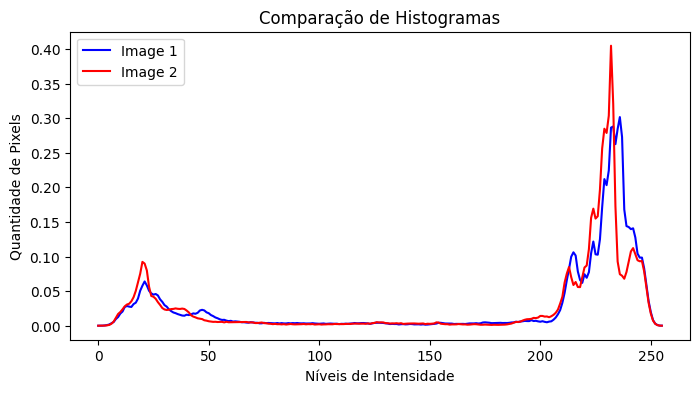

In [14]:
# Calcula os histogramas das imagens
hist1 = cv2.calcHist([image1], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([image2], [0], None, [256], [0, 256])

# Normaliza os histogramas
hist1 = cv2.normalize(hist1, hist1)
hist2 = cv2.normalize(hist2, hist2)

# Plote os histogramas
plt.figure(figsize=(8,4))

plt.plot(hist1, color='blue', label='Image 1')
plt.plot(hist2, color='red', label='Image 2')

plt.title('Comparação de Histogramas')
plt.xlabel('Níveis de Intensidade')
plt.ylabel('Quantidade de Pixels')
plt.legend()

plt.show()

Correlação (cv2.HISTCMP_CORREL):
* Prós: A correlação é uma medida que descreve o grau de relação entre dois histogramas. Esta medida pode ser muito útil para comparar histogramas de imagens similares, pois é sensível às relações lineares entre as intensidades dos pixels. Resultados próximos a 1 indicam alta correlação.
* Contras: A correlação pode ser enganosa se os histogramas possuírem uma estrutura não linear ou se estiverem deslocados ou escalonados em relação um ao outro. Além disso, não funciona bem se os histogramas tiverem diferenças de escala.

Chi-Quadrado (cv2.HISTCMP_CHISQR):
* Prós: A medida Chi-Quadrado é sensível a diferenças de intensidade entre os histogramas, tornando-a útil para comparar histogramas que devem ter estruturas muito semelhantes. Quanto menor o valor, mais semelhantes são os histogramas.
* Contras: Esta medida pode ser afetada por ruído e por diferenças de escala. Além disso, ela não é adequada para dados com baixos números de contagens, já que o chi-quadrado tende a superestimar a diferença nesses casos.

Intersecção (cv2.HISTCMP_INTERSECT):
* Prós: A medida de intersecção compara quantos pixels os dois histogramas têm em comum nos bins correspondentes. É uma métrica simples e direta, sendo útil para comparar imagens que devem ser muito semelhantes.
* Contras: Esta medida pode ser influenciada por ruído e não leva em conta as diferenças nas distribuições de intensidade que não se sobrepõem.

Distância de Bhattacharyya (cv2.HISTCMP_BHATTACHARYYA):
* Prós: A distância de Bhattacharyya é uma medida da quantidade de sobreposição entre dois histogramas estatísticos. Ela é muito útil para comparar histogramas que devem ter estruturas semelhantes, pois leva em conta as diferenças de intensidade e a distribuição de intensidades.
* Contras: Esta medida pode ser influenciada por ruído e por diferenças de escala. Também pode ser menos eficaz se os histogramas tiverem estruturas altamente não lineares.

In [15]:
# Usa o método da correlação
correl = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
print('Correlação:', correl)

# Usa o método Chi-Quadrado
chi_square = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)
print('Chi-Quadrado:', chi_square)

# Usa o método da Intersecção
intersect = cv2.compareHist(hist1, hist2, cv2.HISTCMP_INTERSECT)
print('Intersecção:', intersect)

# Usa o método Bhattacharyya
bhattacharyya = cv2.compareHist(hist1, hist2, cv2.HISTCMP_BHATTACHARYYA)
print('Bhattacharyya:', bhattacharyya)

Correlação: 0.8586286643157501
Chi-Quadrado: 1.3429955718541966
Intersecção: 5.857362643026136
Bhattacharyya: 0.16977226382348187


## 4.2 Exemplo comparando histograma de imagens em uma pasta

In [16]:
import glob

def listar_arquivos_jpg(diretorio):
    # Use a função glob para obter a lista de arquivos .jpg no diretório
    arquivos_jpg = glob.glob(diretorio + '/*.jpg')
    
    return arquivos_jpg

# Exemplo de uso da função
diretorio = 'legos/'  # Substitua pelo caminho do diretório que deseja listar
arquivos_jpg = listar_arquivos_jpg(diretorio)

# Imprima a lista de arquivos .jpg
print(arquivos_jpg)

['legos\\batman1.jpg', 'legos\\batman2.jpg', 'legos\\ca1.jpg', 'legos\\ca2.jpg', 'legos\\flash1.jpg', 'legos\\flash2.jpg', 'legos\\ha1.jpg', 'legos\\ha2.jpg', 'legos\\hf1.jpg', 'legos\\hf2.jpg', 'legos\\hulk1.jpg', 'legos\\hulk2.jpg', 'legos\\robin.jpg', 'legos\\superman1.jpg', 'legos\\superman2.jpg', 'legos\\thor1.jpg', 'legos\\thor2.jpg', 'legos\\wolv1.jpg', 'legos\\wolv2.jpg', 'legos\\ww1.jpg', 'legos\\ww2.jpg']


In [17]:
def calcular_histograma(image):
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
    histogram = cv2.normalize(histogram, histogram)
    return histogram

# Carrega a imagem alvo
imagem_alvo = cv2.imread('legos/batman2.jpg', cv2.IMREAD_GRAYSCALE)

# Calcula o histograma da imagem alvo
histograma_alvo = calcular_histograma(imagem_alvo)

# Dicionário para armazenar o nome do arquivo e o valor de correlação
comparacoes = {}

# Calcula o histograma para cada imagem e compara com o histograma alvo
for arquivo in arquivos_jpg:
    imagem = cv2.imread(arquivo, cv2.IMREAD_GRAYSCALE)
    histograma_imagem = calcular_histograma(imagem)
    
    comparacao = cv2.compareHist(histograma_alvo, histograma_imagem, cv2.HISTCMP_CORREL)
    comparacoes[arquivo] = comparacao
    
# Ordena o dicionário de comparações em ordem decrescente
comparacoes_ordenadas = sorted(comparacoes.items(), key=lambda x: x[1], reverse=True)

# Imprima o ranking das imagens
for i, (arquivo, comparacao) in enumerate(comparacoes_ordenadas):
    print(f"Ranking {i+1}: {arquivo}, Comparação: {comparacao}")

Ranking 1: legos\batman2.jpg, Comparação: 1.0
Ranking 2: legos\thor1.jpg, Comparação: 0.9492397479053676
Ranking 3: legos\ww1.jpg, Comparação: 0.9471895443166769
Ranking 4: legos\ca1.jpg, Comparação: 0.9468464795317191
Ranking 5: legos\hf2.jpg, Comparação: 0.9418291067565373
Ranking 6: legos\superman1.jpg, Comparação: 0.9388443253641906
Ranking 7: legos\flash1.jpg, Comparação: 0.9309455392845013
Ranking 8: legos\superman2.jpg, Comparação: 0.8828372411507495
Ranking 9: legos\batman1.jpg, Comparação: 0.8586286643157501
Ranking 10: legos\thor2.jpg, Comparação: 0.8427799553393458
Ranking 11: legos\ha2.jpg, Comparação: 0.7633116031772815
Ranking 12: legos\ww2.jpg, Comparação: 0.7480610033240158
Ranking 13: legos\ha1.jpg, Comparação: 0.7403900372610334
Ranking 14: legos\hulk1.jpg, Comparação: 0.6463880040002907
Ranking 15: legos\ca2.jpg, Comparação: 0.6353335416749206
Ranking 16: legos\hf1.jpg, Comparação: 0.6146841460837523
Ranking 17: legos\robin.jpg, Comparação: 0.6119644361208032
Ranking

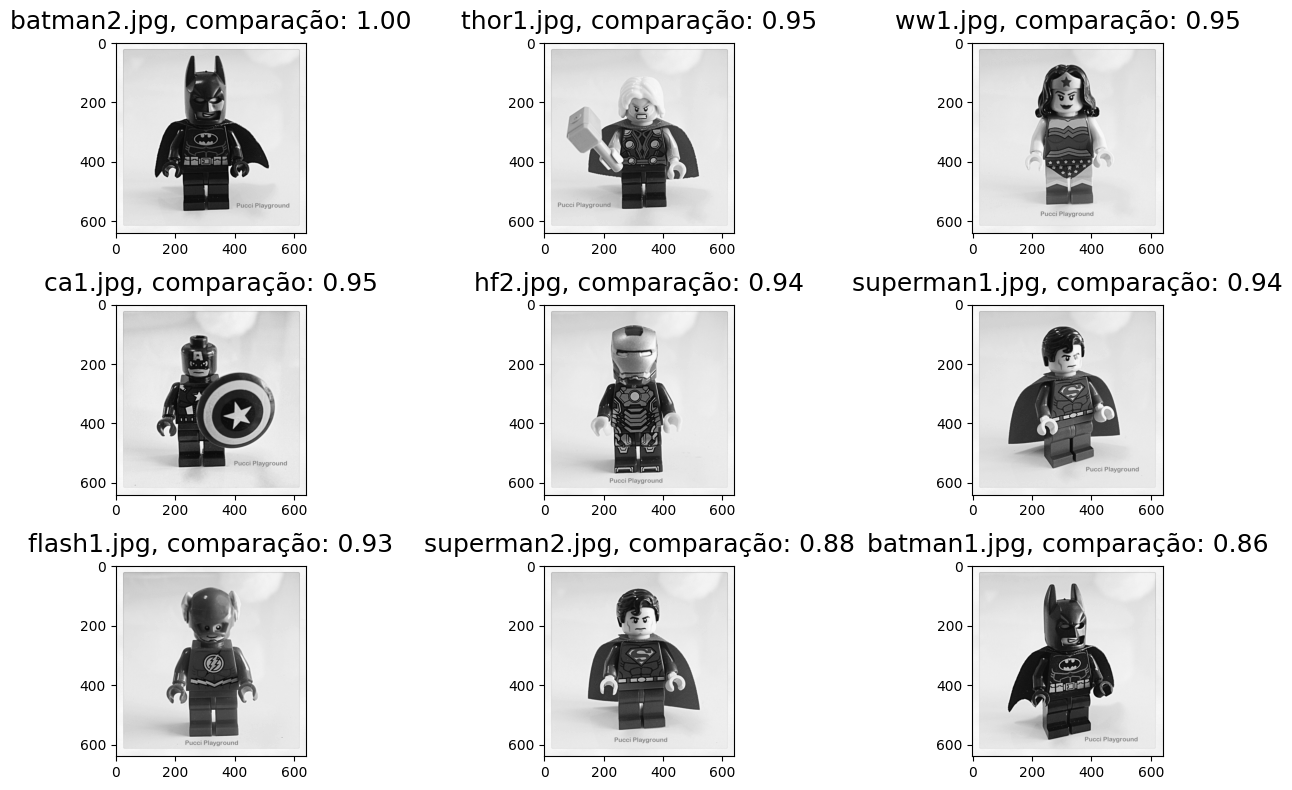

In [18]:
# Armazenar as primeiras imagens mais parecidas e seus títulos
imagens_top = []
titulos_top = []

# Carrega as primeiras imagens mais parecidas
for i in range(9):
    arquivo, comparacao = comparacoes_ordenadas[i]
    imagem = cv2.imread(arquivo, cv2.IMREAD_GRAYSCALE)
    imagens_top.append(imagem)
    nome_arquivo_imagem = arquivo.split('\\')[1]
    titulos_top.append(f"{nome_arquivo_imagem}, comparação: {comparacao:.2f}")
    
# Exiba as imagens mais parecidas, em ordem
showImages(imagens_top, titulos_top, size=(14, 8), grid=(3, 3))

## 4.3 Exemplo comparando histograma RGB de imagens em uma pasta

In [19]:
def calcular_histograma(image):
    # Converte a imagem para grayscale para criar a máscara
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplica a limiarização de Otsu para criar uma máscara
    _, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
    # Calcular os histogramas para cada canal de cores
    histogram_R = cv2.calcHist([image], [0], mask, [256], [0, 256])
    histogram_G = cv2.calcHist([image], [1], mask, [256], [0, 256])
    histogram_B = cv2.calcHist([image], [2], mask, [256], [0, 256])
    
    # Normaliza cada histograma
    histogram_R = cv2.normalize(histogram_R, histogram_R)
    histogram_G = cv2.normalize(histogram_G, histogram_G)
    histogram_B = cv2.normalize(histogram_B, histogram_B)

    # Concatena os histogramas
    histogram = np.concatenate((histogram_R, histogram_G, histogram_B))
    
    return histogram

# Carrega a imagem alvo
imagem_alvo = cv2.imread('legos/batman2.jpg')

# Calcule o histograma da imagem alvo
histograma_alvo = calcular_histograma(imagem_alvo)

# Dicionário para armazenar o nome do arquivo e o valor de correlação
comparacoes = {}

# Calcula o histograma para cada imagem e compare com o histograma alvo
for arquivo in arquivos_jpg:
    imagem = cv2.imread(arquivo)
    histograma_imagem = calcular_histograma(imagem)
    
    comparacao = cv2.compareHist(histograma_alvo, histograma_imagem, cv2.HISTCMP_BHATTACHARYYA)
    comparacoes[arquivo] = comparacao
    
# Ordena o dicionário de comparações em ordem decrescente
comparacoes_ordenadas = sorted(comparacoes.items(), key=lambda x: x[1], reverse=False)

# Imprima o ranking das imagens
for i, (arquivo, comparacao) in enumerate(comparacoes_ordenadas):
    print(f"Ranking {i+1}: {arquivo}, Comparação: {comparacao}")

Ranking 1: legos\batman2.jpg, Comparação: 0.0
Ranking 2: legos\batman1.jpg, Comparação: 0.1314114462365119
Ranking 3: legos\wolv2.jpg, Comparação: 0.22452026049243054
Ranking 4: legos\wolv1.jpg, Comparação: 0.2357599352739275
Ranking 5: legos\ca1.jpg, Comparação: 0.3262495766808194
Ranking 6: legos\thor1.jpg, Comparação: 0.34419441388265115
Ranking 7: legos\ca2.jpg, Comparação: 0.3608513554262372
Ranking 8: legos\hulk2.jpg, Comparação: 0.37494484060740113
Ranking 9: legos\hf2.jpg, Comparação: 0.3773123040225691
Ranking 10: legos\robin.jpg, Comparação: 0.3784472647660672
Ranking 11: legos\ha2.jpg, Comparação: 0.3872356890868455
Ranking 12: legos\thor2.jpg, Comparação: 0.3915599849765965
Ranking 13: legos\ww1.jpg, Comparação: 0.3992032596228242
Ranking 14: legos\hf1.jpg, Comparação: 0.43189339468718657
Ranking 15: legos\hulk1.jpg, Comparação: 0.4359814889610768
Ranking 16: legos\superman1.jpg, Comparação: 0.43922365709193667
Ranking 17: legos\superman2.jpg, Comparação: 0.4397415943439117

In [20]:
# Armazenar as primeiras imagens mais parecidas e seus títulos
imagens_top = []
titulos_top = []

# Carrega as nove primeiras imagens mais parecidas
for i in range(9):
    arquivo, comparacao = comparacoes_ordenadas[i]
    imagem = cv2.imread(arquivo)
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)  # Converte de BGR para RGB
    imagens_top.append(imagem)
    nome_arquivo_imagem = arquivo.split('\\')[-1]
    titulos_top.append(f"{nome_arquivo_imagem}, comparação: {comparacao:.2f}")
    
# Exiba as imagens mais parecidas, em ordem
showImages(imagens_top, titulos_top, size=(15, 8), grid=(3, 3)) 

# 5. Backprojection de Histograma

É uma forma de representar uma imagem, que é usada para a segmentação de imagens ou para o rastreamento de objetos. Ela foi inicialmente proposta por Michael J. Swain e Dana H. Ballard em seu artigo "Indexing via color histograms" de 1990: https://ieeexplore.ieee.org/document/139558

O conceito básico da Backprojection é usar histogramas para identificar as áreas de uma imagem que contêm cores específicas. Isso é feito criando um "mapa" de cada pixel da imagem com base em um histograma fornecido, o que resulta em uma imagem em escala de cinza onde os valores dos pixels representam a probabilidade de um pixel pertencer ao objeto que estamos tentando rastrear ou segmentar.

## 5.1 Aplicação de Backprojection de Histograma usando OpenCV

Para aplicar o Backprojection de Histograma no OpenCV, você precisará de duas coisas: a imagem de origem e a imagem a ser backprojected. A imagem de origem é geralmente uma imagem contendo o objeto que você está interessado em rastrear ou segmentar.

Por meio dessa técnica, temos uma forma robusta para segmentar ou rastrear objetos, construindo um modelo estatístico que lida melhor com questões como de iluminação.

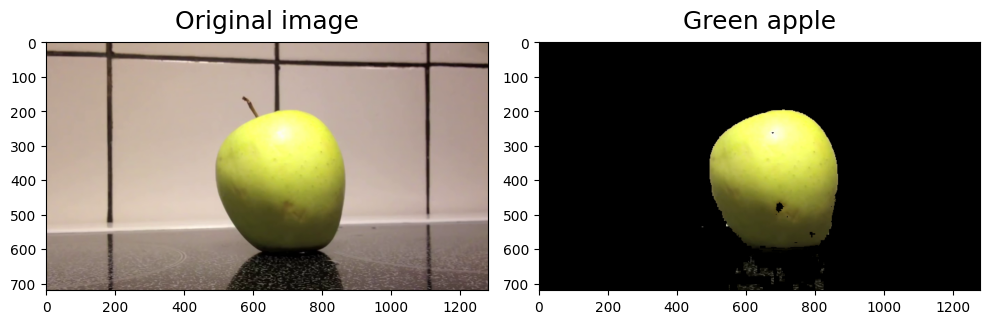

In [21]:
# Crie um objeto VideoCapture e especifique o arquivo de vídeo para ler
cap = cv2.VideoCapture('maca_caindo.mp4')

# Leia o primeiro frame do vídeo
ret, frame = cap.read()

# Verifica se o frame foi lido corretamente
if not ret:
    print("Não foi possível receber o frame.")
    
# Converter o frame de RGB para HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# Definir o intervalo de cores verde no espaço HSV
lower_green = np.array([25, 0, 0])
upper_green = np.array([40, 255, 255])

# Criar uma máscara
mask = cv2.inRange(hsv, lower_green, upper_green)

# Aplicar a máscara à imagem
result = cv2.bitwise_and(frame, frame, mask=mask)

# Converter as imagens para RGB
image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# Exibir a imagem original e a imagem resultante com sua função
showImages([image_rgb, result_rgb], ['Original image', 'Green apple'], size=(10,10), grid=(1,2))

cap.release()

In [22]:
# Calcule o histograma do objeto de interesse (a maçã) com a máscara para o espaço de cor HSV
histograma_obj = cv2.calcHist([hsv], [0, 1], mask, [180, 256], [0, 180, 0, 256])

# Normalizar o histograma
histograma_obj = cv2.normalize(histograma_obj, histograma_obj, 0, 255, cv2.NORM_MINMAX)

# Use a função calcBackProject para obter a imagem de backprojection
dst = cv2.calcBackProject([hsv], [0,1], histograma_obj, [0,180,0,256], 1)

# Exibir a imagem original e a imagem resultante com sua função
showImages([dst], ['teste'], size=(5,5), grid=(1,1))

In [23]:
# Cria um objeto VideoCapture e especifique o arquivo de vídeo para ler
cap = cv2.VideoCapture('maca_caindo.mp4')

# Obtenha as dimensões do vídeo
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Crie um objeto VideoWriter para salvar o vídeo resultante
out = cv2.VideoWriter('maca_segmentada.mp4',cv2.VideoWriter_fourcc('M','J','P','G'), 10, \
                      (frame_width, frame_height))

while(cap.isOpened()):
    # Leia o próximo frame do vídeo
    ret, frame = cap.read()

    # Se o frame foi lido corretamente, ret é True
    if not ret:
        print("Não foi possível receber o próximo frame. Fim do vídeo.")
        break
        
    # Converta a imagem para o espaço de cor HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # Use a função calcBackProject para obter a imagem de backprojection
    dst = cv2.calcBackProject([hsv], [0,1], histograma_obj, [0,180,0,256], 1)

    # Faça uma operação bitwise_and entre a imagem de backprojection (dst) e a imagem original (frame) 
    # para obter a imagem resultante
    res = cv2.bitwise_and(frame,frame, mask=dst)
    
    # Salve o frame resultante no novo arquivo de vídeo
    out.write(res)
    
    #cv2.imshow('Video', res)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Quando tudo estiver feito, libere o objeto VideoCapture e feche as janelas
cap.release()
cv2.destroyAllWindows()

Não foi possível receber o próximo frame. Fim do vídeo.


# Referências

* https://docs.opencv.org/3.4/d1/db7/tutorial_py_histogram_begins.html
* https://pyimagesearch.com/2014/01/22/clever-girl-a-guide-to-utilizing-color-histograms-for-computer-vision-and-image-search-engines/
* https://www.opencv-srf.com/2018/02/histogram-equalization.html
* https://pyimagesearch.com/2014/07/14/3-ways-compare-histograms-using-opencv-python/
* https://docs.opencv.org/3.4/da/d7f/tutorial_back_projection.html